In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#load the expression data for trainY
lines = []
leu2level = []
with open('expression.txt') as f:
    lines = f.readlines()
for line in lines:
     leu2level.append(float(line.split(' ')[394])) #the leu column
#print(leu2level[:10]) 

In [3]:
#load the SNP sample data for trainX
lines = []
samples = [[0 for x in range(1260)] for y in range(114)] 
with open('SNPs.txt') as f:
    lines = f.readlines()
i = 0
for line in lines:
    samples[i] = (line.strip().split())
    i+=1
samplearray = np.array(samples).astype(float) #SNPs in column, each row = sample
#print(sampletrans[0])

In [4]:
# Mean center all datasets

#mean center y
ymean = sum(leu2level)/len(leu2level)
trainY = []

for i, val in enumerate(leu2level):
    trainY.append(val-ymean)
trainY = np.array(trainY)


#print(trainY)

#mean center x

trainX = samplearray
#print(trainX[0])
colmean = np.mean(trainX, axis=0)

for index, x in np.ndenumerate(trainX):
    x -= colmean[index[1]]
    trainX[index[0]][index[1]] = x
    
#print(trainX[0][0], trainX[0][0]+colmean[0])


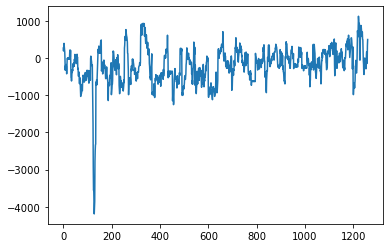

In [5]:
#question3a
#Univariate regression for all SNPs
betai=[0]*1260

for i in range(1260):
    x=trainX[:,i] #select single SNP
    xt = np.transpose(x) 
    betai[i] = xt.dot(x)*(xt.dot(trainY))

plt.plot(betai)
plt.show()

In [ ]:
#question 3b

'''
It is not possible to estimate coefficients for a multivariate regression model.
Because XtX will not be inverstible since we are having a small number of samples
and a large number of features. There are 1260 SNPs with only 114 strains.
r
'''

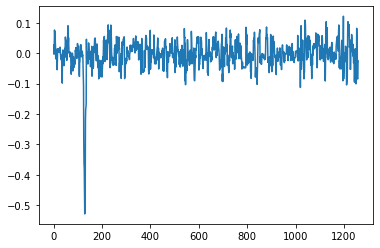

In [6]:
#ridge regression part1

Xt = np.transpose(trainX)
XtX = Xt.dot(trainX)
m, _ = XtX.shape
I = np.matrix(np.eye(m))
phiI = 1/5*I
left = np.linalg.inv(XtX + phiI)

sigma1 = left.dot(Xt.dot(trainY))
sigma1 =sigma1.tolist()[0]
plt.plot(sigma1)
plt.show()


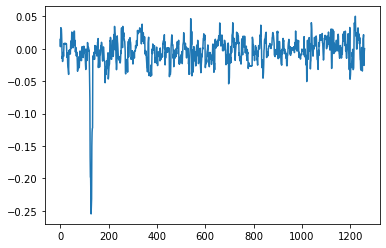

In [7]:
#ridge regression part2
Xt = np.transpose(trainX)
XtX = Xt.dot(trainX)
m, _ = XtX.shape
I = np.matrix(np.eye(m))
phiI = 1/0.005*I
left = np.linalg.inv(XtX + phiI)

sigma2 = left.dot(Xt.dot(trainY))
sigma2 =sigma2.tolist()[0]
plt.plot(sigma2)
plt.show()

In [8]:
#question3c
minval= min(sigma1)
print(sigma1.index(minval))
minval2= min(sigma2)
print(sigma2.index(minval2))
minval3=min(betai)
print(betai.index(minval3))

128
128
128


In [ ]:
#question3c

'''
A smaller sigma-nod means a stronger prior belief, which will resulted in a more concentrated distribution of the parameter.
A larger sigma-nod means the distribution of parameter will be broader.
As observed in the plots, the first plot has more noise and the linesare near to each other, 
while the second plot has more distinct lines since the parameter distribution is more concentrated. 

From all regression models avoe, SNP129 has the strongest influence on LEU2,
as could be observed by the lowest point from the plot.
Refering to the genes file, this SNP locates in YDR085C. 
'''